In [18]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage


In [19]:
#Prepare the data
#Load the data
data=pd.read_csv('/content/Mall_Customers.csv')
print(data.head(10))

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
5           6  Female   22                  17                      76
6           7  Female   35                  18                       6
7           8  Female   23                  18                      94
8           9    Male   64                  19                       3
9          10  Female   30                  19                      72


In [20]:
#Drop CustomerID because it's just an identifier and not useful for clustering
data=data.drop('CustomerID',axis=1)

#Convert gender to numerical from text(Male:1,Female:0)
data['Gender']=data['Gender'].map({"Male":1,"Female": 0})

#Normalize the data
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)

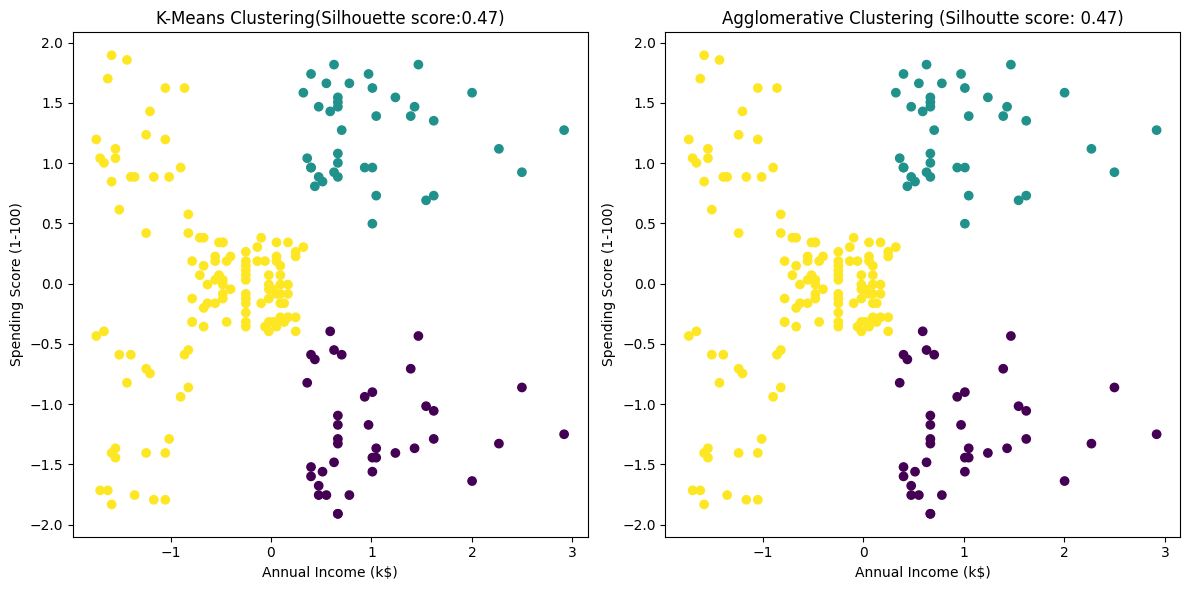

In [26]:
#Select the features to be used for clustering
X=data[["Annual Income (k$)","Spending Score (1-100)"]].values
X=StandardScaler().fit_transform(X)

#Apply Kmeans
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(X)
Kmeans_sil=silhouette_score(X, labels)

#Apply agglomerative clustering
agglomerative=AgglomerativeClustering(n_clusters=3)
agglomerative.fit_predict(X)
Agglomerative_sil=silhouette_score(X, labels)

#Plot the results side by side for comparison
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

#Kmeans plot
scatter1=axs[0].scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
axs[0].set_xlabel("Annual Income (k$)")
axs[0].set_ylabel("Spending Score (1-100)")
axs[0].set_title(f"K-Means Clustering(Silhouette score:{Kmeans_sil:.2f})")

#Agglomerative plot
scatter2=axs[1].scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
axs[1].set_xlabel("Annual Income (k$)")
axs[1].set_ylabel("Spending Score (1-100)")
axs[1].set_title(f"Agglomerative Clustering (Silhoutte score: {Agglomerative_sil:.2f})")

plt.tight_layout()
plt.show()

Text(0, 0.5, 'Distance')

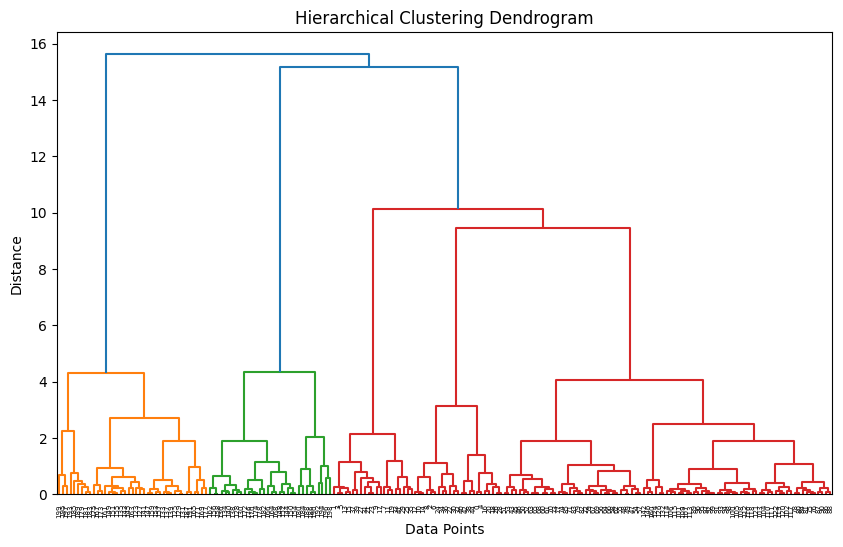

In [27]:
#Plot the hierarchical clustering dendogram
linkage_matrix = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")

In [28]:
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import linkage

#Determine the cut of the dendogram/selecting the euclidian distance
max_d = 10
clusters = fcluster(linkage_matrix, max_d, criterion='distance')

#Calculate the silhouette score
silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.4925507715349343


Text(0, 0.5, 'Inertia')

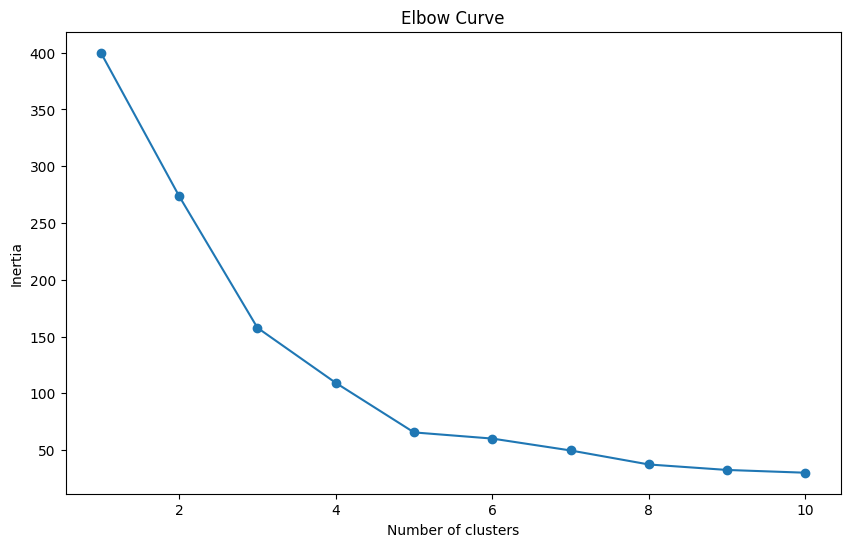

In [32]:
#Plot the otpimal K using the elbow method
inertias=[] #built in method to calculate SSE
for k in range(1,11): #Tests K in a given range from 1 to 10
  kmeans=KMeans(n_clusters=k,random_state=42) #Creates our Kmeans model
  kmeans.fit(X) #Fits our model
  inertias.append(kmeans.inertia_)

#Plt the elbow curve
plt.figure(figsize=(10,6))
plt.plot(range(1, 11), inertias,marker = 'o')
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')